In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Thu Jul  1 13:39:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!unzip -O cp949 '/content/drive/MyDrive/5kfood.zip' -d '/content/6food'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/6food/삼계탕/Img_138_0013.JPG  
  inflating: /content/6food/삼계탕/Img_138_0014.jpg  
  inflating: /content/6food/삼계탕/Img_138_0015.jpg  
  inflating: /content/6food/삼계탕/Img_138_0016.jpg  
  inflating: /content/6food/삼계탕/Img_138_0017.jpg  
  inflating: /content/6food/삼계탕/Img_138_0018.jpg  
 extracting: /content/6food/삼계탕/Img_138_0019.jpg  
 extracting: /content/6food/삼계탕/Img_138_0020.jpg  
  inflating: /content/6food/삼계탕/Img_138_0021.jpg  
  inflating: /content/6food/삼계탕/Img_138_0022.jpg  
 extracting: /content/6food/삼계탕/Img_138_0023.jpg  
  inflating: /content/6food/삼계탕/Img_138_0024.jpg  
  inflating: /content/6food/삼계탕/Img_138_0025.jpg  
  inflating: /content/6food/삼계탕/Img_138_0026.jpg  
  inflating: /content/6food/삼계탕/Img_138_0027.jpg  
  inflating: /content/6food/삼계탕/Img_138_0028.jpg  
  inflating: /content/6food/삼계탕/Img_138_0029.jpg  
  inflating: /content/6food/삼계탕/Img_138_0030.jpg  
  inflating: /content/6food/삼계탕/Img_138_0031.j

In [4]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "/content/6food"
categories = ["삼겹살",'삼계탕','양념치킨','짜장면','피자','후라이드치킨']
nb_classes = len(categories)

image_w = 224
image_h = 224

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("/content/6food_array", xy)

print("ok", len(y))

삼겹살  파일 길이 :  986
삼겹살  :  /content/6food/삼겹살/Img_008_0255.jpg
삼겹살  :  /content/6food/삼겹살/Img_008_0024.jpg
삼계탕  파일 길이 :  1000
삼계탕  :  /content/6food/삼계탕/Img_138_0932.jpg
삼계탕  :  /content/6food/삼계탕/Img_138_0670.jpg
양념치킨  파일 길이 :  951
양념치킨  :  /content/6food/양념치킨/Img_023_0486.jpg


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


양념치킨  :  /content/6food/양념치킨/Img_023_0431.jpg
짜장면  파일 길이 :  977
짜장면  :  /content/6food/짜장면/Img_057_0177.jpg
짜장면  :  /content/6food/짜장면/Img_057_0744.jpg
피자  파일 길이 :  944
피자  :  /content/6food/피자/Img_027_0235.jpg
피자  :  /content/6food/피자/Img_027_0301.jpg


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


후라이드치킨  파일 길이 :  982
후라이드치킨  :  /content/6food/후라이드치킨/Img_028_0132.jpg
후라이드치킨  :  /content/6food/후라이드치킨/Img_028_0070.jpg


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ok 5840


In [5]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
#import keras.backend.tensorflow_backend as K

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('/content/6food_array.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])
print(X_test.shape)
print(X_test.shape[0])

(4380, 224, 224, 3)
4380
(1460, 224, 224, 3)
1460


In [6]:
print(y_train)

[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 ...
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]]


In [19]:
categories = ["삼겹살",'삼계탕','양념치킨','짜장면','피자','후라이드치킨']
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [20]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [21]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)           

In [22]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/50
69/69 [==============================] - 5s 57ms/step - loss: 1.7905 - accuracy: 0.1921 - val_loss: 1.6959 - val_accuracy: 0.2575

Epoch 00001: val_loss improved from inf to 1.69593, saving model to ./model/multi_img_classification.model
INFO:tensorflow:Assets written to: ./model/multi_img_classification.model/assets
Epoch 2/50
69/69 [==============================] - 3s 43ms/step - loss: 1.6055 - accuracy: 0.3176 - val_loss: 1.4451 - val_accuracy: 0.4267

Epoch 00002: val_loss improved from 1.69593 to 1.44513, saving model to ./model/multi_img_classification.model
INFO:tensorflow:Assets written to: ./model/multi_img_classification.model/assets
Epoch 3/50
69/69 [==============================] - 3s 43ms/step - loss: 1.4191 - accuracy: 0.4178 - val_loss: 1.3931 - val_accuracy: 0.4596

Epoch 00003: val_loss improved from 1.44513 to 1.39313, saving model to ./model/multi_img_classification.model
INFO:tensorflow:Assets written to: ./model/multi_img_classification.model/assets
Ep

In [24]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

46/46 [==============================] - 1s 10ms/step - loss: 1.2942 - accuracy: 0.5925
정확도 : 0.5925


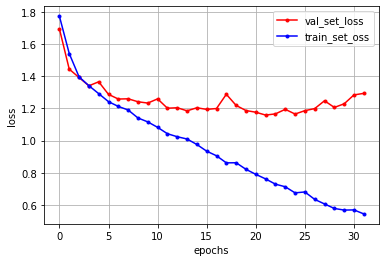

In [25]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [26]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/MyDrive/test"
image_w = 224
image_h = 224

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('/content/model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0


#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.  ategories = ["삼겹살",'삼계탕','양념치킨','짜장면','피자','후라이드치킨']
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "삼겹살"
    elif pre_ans == 1: pre_ans_str = "삼계탕"
    elif pre_ans == 2: pre_ans_str = "양념치킨"
    elif pre_ans == 3: pre_ans_str = "짜장면"
    elif pre_ans == 4: pre_ans_str = "피자"
    else: pre_ans_str = "후라이드치킨"
    if i[0] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"으 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[4] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[5] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
    # 이걸 한 것은 _4.py에.

[0.000 0.000 1.000 0.000 0.000 0.000]
2
해당 /content/drive/MyDrive/test/후라이드.jfif이미지는 양념치킨로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000]
2
해당 /content/drive/MyDrive/test/삼겹살.jfif이미지는 양념치킨로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000]
3
해당 /content/drive/MyDrive/test/삼계탕.jfif이미지는 짜장면로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000]
3
해당 /content/drive/MyDrive/test/자장면.jpg이미지는 짜장면로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000]
3
해당 /content/drive/MyDrive/test/피자.jfif이미지는 짜장면로 추정됩니다.
